# Étape 1/ Exploration des données + DataViz’

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_file(nom_fichier):
    """
    nom_fichier (str): path du fichier
    exemple: read_file('./data/ratings.csv')
    """
    if nom_fichier.endswith('.csv'):
        df = pd.read_csv(nom_fichier)
    elif nom_fichier.endswith('.tsv.gz'):
        df = pd.read_csv(nom_fichier, compression='gzip', sep='\t')
    else:
        print("Format de fichier non supporté.")
        return
    return df



## Genre

In [2]:
# There are separate genre categories in IMDB and in MovieLens databases. We examine similarities and differences
#In IMDB genres related to each film are provided in title.basics.tsv file. Genres are a pipe-separated list provided in column 'genres'
# in MovieLens,
# we examine silimarities between the two genres classifications

In [3]:
#genres in IMDB

In [4]:
#df_titleBasics = read_file("./data/title.basics.tsv.gz")
df_titleBasics = pd.read_csv('title.basics.tsv', sep="\t")

C:\Users\EFCA7255\AppData\Local\Temp\1\ipykernel_3360\1298128005.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_titleBasics = pd.read_csv('title.basics.tsv', sep="\t")


In [6]:
def stack_unique_imdb(df, column_name):
    all_values = set()
    result = []

    for index, cell in df[column_name].items():
        values = cell.split(',') if cell else []
        for value in values:
            if value not in all_values:
                result.append([index, value])
                all_values.add(value)

    return pd.DataFrame(result, columns=['index', 'value']).set_index('index')['value']

In [7]:
df_titleBasics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11266641 entries, 0 to 11266640
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 773.6+ MB


In [8]:
df_titleBasics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [9]:
#'genres' column in df_titleBasics (title.basics database in imdb) is object type, should cast into string before further analysis

In [10]:
df_titleBasics['genres'] = df_titleBasics['genres'].astype('string')

In [11]:
#checking for missing values

In [12]:
print(df_titleBasics['genres'].isna().sum(), '\n')

633 



In [13]:
#remove the rows with missing values in the  column 'genres' as it creates problems when checking for unique values in genres column
df_titleBasics2 = df_titleBasics.dropna(axis = 0, how = 'all', subset = ['genres'])

In [14]:
# Specify the column you want to extract unique values from
imdb_genres = 'genres'  # Change to the desired column name
stacked_series_genres_imdb = stack_unique_imdb(df_titleBasics2, imdb_genres)

print(stacked_series_genres_imdb)

index
0        Documentary
0              Short
1          Animation
2             Comedy
2            Romance
6              Sport
22              News
34             Drama
65           Fantasy
73            Horror
130        Biography
132            Music
170              War
174            Crime
181          Western
222           Family
232        Adventure
270           Action
349          History
497          Mystery
498               \N
512           Sci-Fi
596          Musical
1245        Thriller
18250      Film-Noir
37597      Talk-Show
38431      Game-Show
39334     Reality-TV
61489          Adult
Name: value, dtype: object


In [15]:
stacked_series_genres_imdb

index
0        Documentary
0              Short
1          Animation
2             Comedy
2            Romance
6              Sport
22              News
34             Drama
65           Fantasy
73            Horror
130        Biography
132            Music
170              War
174            Crime
181          Western
222           Family
232        Adventure
270           Action
349          History
497          Mystery
498               \N
512           Sci-Fi
596          Musical
1245        Thriller
18250      Film-Noir
37597      Talk-Show
38431      Game-Show
39334     Reality-TV
61489          Adult
Name: value, dtype: object

In [16]:
#previous list of genres is to be compared with one in movielens
# we remark some categories are only related to TV shows: these are categories such as:
# Talk-Show, Game-Show, Reality-TV
# category short seems to be duration-related (probably relates to older, 19th century or ealry 20th century productions? to verify)
# Adult is a specific category

In [17]:
#genres in MovieLens

In [18]:
#n MovieLens database, genre related information is provided in movies.csv file

In [19]:
#mv_movies = pd.read_csv('movies.csv')
mv_movies = read_file("./data/movies.csv")

In [20]:
mv_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [21]:
# identify the different genres in movies.csv , mv_movies['genres'] column :

In [22]:
genres_mvl = mv_movies['genres'].str.split('|', expand=True).stack().reset_index(drop=True)

In [18]:
genres_mvl

0                 Adventure
1                 Animation
2                  Children
3                    Comedy
4                   Fantasy
                ...        
54401             Adventure
54402    (no genres listed)
54403             Adventure
54404               Fantasy
54405                Horror
Length: 54406, dtype: object

In [23]:
# need to avoid duplicated genres by using set in order to obtain unique values of genre film categorisation in movielens:

In [24]:
def stack_unique(df, column_name):
    all_values = set()
    result = []

    for index, cell in df[column_name].items():
        values = cell.split('|') if cell else []
        for value in values:
            if value not in all_values:
                result.append([index, value])
                all_values.add(value)

    return pd.DataFrame(result, columns=['index', 'value']).set_index('index')['value']


In [25]:
# Specify the column you want to extract unique values from
target_column = 'genres'  # Change to the desired column name
stacked_series_genres_mvl = stack_unique(mv_movies, target_column)

print(stacked_series_genres_mvl)

index
0                 Adventure
0                 Animation
0                  Children
0                    Comedy
0                   Fantasy
2                   Romance
3                     Drama
5                    Action
5                     Crime
5                  Thriller
11                   Horror
21                  Mystery
23                   Sci-Fi
32                     IMAX
36              Documentary
40                      War
47                  Musical
161                 Western
162               Film-Noir
16574    (no genres listed)
Name: value, dtype: object


In [26]:
#from previous list, 19 different genres are used to categorise movies in movielens. Some movies are attached to more than one genres
# there exist movies that are not associated to no particular genre whatsoever (no genres listed)

In [27]:
#display the distribution of genres in movielens

In [28]:
# 1. Split the pipe-separated values into individual categories for genres
all_categories = []
for index in mv_movies.index:
    categories = mv_movies.loc[index, 'genres'].split('|')
    all_categories.extend(categories)

In [29]:
# 2. Count the occurrences of each category
category_counts = pd.Series(all_categories).value_counts()

In [30]:
# 3. Display the distribution (counts)
print(category_counts)

Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
Name: count, dtype: int64


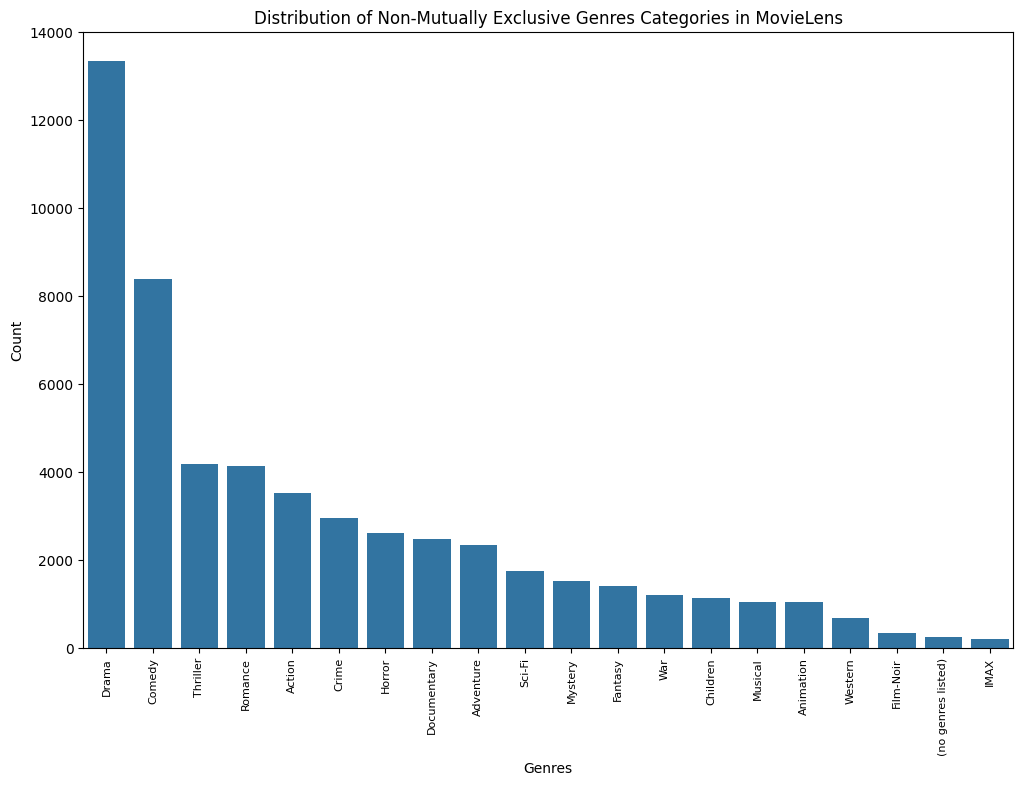

In [31]:
# 4. Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Distribution of Non-Mutually Exclusive Genres Categories in MovieLens")
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [32]:
# in previous figure, showing distribution of genres categories in MovieLens databases,
# we observe that most represented genres are drama, followed in distance by comedy, followed by distance by thriller

In [33]:
#In separate XL file, when comparing genres among movielens and imdb, we observe that almost all genres in Movielens are also present in imdb,
# with the exception of IMAX and Children (there is no equivalent of IMAX in IMDB, while in imdb there is a separate category called Family that could be close to the Children category?)
# other genre categories available only in imdb seem more related to TV (these are Sport, News, Music, Talk-show, Game-Show, Reality-TV)
# other genre only available in imbd (not in movielens) include Biography, History, Adult, Short)
# there are some films with no genre information available, in movielens it is noted as (no genres listed), while in imdb it is noted as  \N

In [34]:
# HOW 'genres' categories in movies.csv relate to existing 'tags' in genome-tags.csv ? to further investigate

In [35]:
# JAN 2025
# checking relation of genres with notes

In [36]:
category_counts

Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
Name: count, dtype: int64

In [37]:
type(category_counts)

pandas.core.series.Series

In [38]:
type(all_categories)

list

## TAGS

In [39]:
#Tags are user generated short descriptions associated with each movie
# each tag with its tagId is provided in file genome_tags.csv
#b

In [40]:
mv_gen_tags = pd.read_csv('genome-tags.csv')

In [41]:
mv_gen_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [42]:
mv_gen_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [43]:
mv_gen_tags['tag'].nunique()

1128

In [44]:
# There are 1128 different tags in MovieLens

In [45]:
pd.set_option('display.max_rows', None)  # Show all rows

In [46]:
mv_gen_tags['tag'].head(600)

0                                              007
1                                     007 (series)
2                                     18th century
3                                            1920s
4                                            1930s
5                                            1950s
6                                            1960s
7                                            1970s
8                                            1980s
9                                     19th century
10                                              3d
11                                            70mm
12                                             80s
13                                            9/11
14                                         aardman
15                                 aardman studios
16                                        abortion
17                                          absurd
18                                          action
19                             

In [47]:
mv_gen_tags['tag'].tail(600)

528                                              humorous
529                                               hunting
530                                              idealism
531                                              identity
532                                               idiotic
533                                      imaginary friend
534                                           imagination
535                                          imdb top 250
536                                            immigrants
537                                           immortality
538                                                incest
539                                      independent film
540                                                 india
541                                         indiana jones
542                                               indians
543                                                 indie
544                                            infidelity
545           

In [48]:
#1128 different tags available in genome_scores.csv, with ids from 1 up to 1128
# no capital letters in the tags in movielens
# tags in movielens include various categories, spaning time period of the movie (century, decade), places (las vegas, italy, hawai), appreciation (great, great acting, good sequel, funny, hard to watch, too long, too short), creators (francis ford copolla, hollywood, studio ghibli)
# film genre (murder, musical, mystery, slapstick) etc. situations dealt with in the film (mother daughter relationship, mother-son relationship, parenthood, religion) elements (penguins, poker) social analysis (racism, propaganda, slavery)
# atmosphere (nostalgic, nocturnal), prizes (oscar, oscar (best supporting actress), saturn award (best special effects))
# situations (survival, switching places, terminal illness, teleportation)
# gender related (gay, homophobia) employment (lawyer, lawyers)
# tips for spectators (watch the credits)
# redundancy included in the tags (german, germany; gangster, gangsters; monster, monsters, stop motion, stop-motion )
# (super hero, super-hero, superhero, superheroes)
# 007, 007 (series), james bond
# other redundancies as well ++



In [49]:
# BEST To REgroup these terms that are COmpletely REDUNTANT ?? (regroup to same tag? other tagID to introduce?)
# should also consider tags /genres catagorisation in imdb before any such actions


In [50]:
#TAGS and RELEVANCE

In [51]:
mv_gen_scores = pd.read_csv('genome-scores.csv')

In [ ]:
mv_gen_scores.info()

In [52]:
#explore distribution of relevance of tags in genome-scores.csv (mv_gen_scores dataframe)

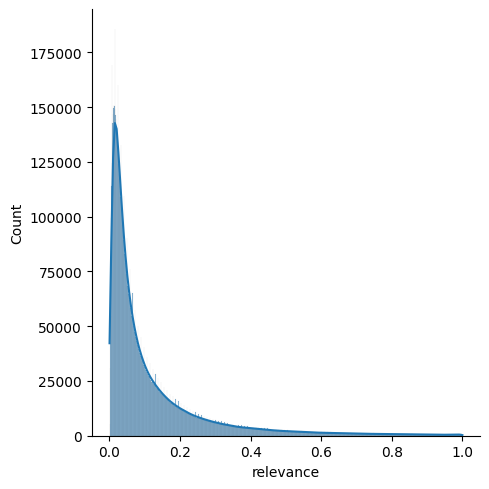

In [53]:
sns.displot(mv_gen_scores.relevance, kind='hist', kde=True)
plt. show()

In [54]:
# Relevance notes are provided per tag and per movie (dense matrix in genome-scores.csv (mv_gen_scores dataframe)), lower value is 0 highest is 1.
# as explained in pdf article, tags are introduced by users, and relevance (float number from 0.0 to 1.0) is machine learning calculated
# genome_scores.csv is a dense matrix where for each movie in this file there is a relevance value for each tag in the genome. Each line provides movieId, tagId and relevance note for this tagId for that movieId (there are multiple rows for each movie, so that all tags are associated for each movie)
# we observe in previous graph that most relevance notes are closer to 0 than to 1. This shows that most tags are not so relevant to any particular movie, as expected from the creation of dense matrix.
# there are  11709768 lines (rows) for genome_scores.csv


In [55]:
# HOW TO STUDY/EXPLORE RELATION BETWEEN TAG and GENRE?

## Ratings

In [56]:
df_ml = read_file("./data/ratings.csv")

In [57]:
# JAN 2025 EA
# checking relation between genres and notes/ratings from users
# In MOvielens, information on ratings is provided in database/file ratings.csv, available in our notebook as df_ml 
# In MOvielens, information on genres is provided in database/file movies.csv, available in our notebook as mv_movies

In [58]:
# should merge info between ratings.csv (userId,movieId,rating,timestamp) and movies.csv (movieId,title,genres)

In [59]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [60]:
mv_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [61]:
df_mvl_genre_ratings = pd.merge(df_ml, mv_movies, left_on='movieId', right_on='movieId')

In [62]:
df_mvl_genre_ratings.head()


,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,1112484819,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,1112484727,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,1112484580,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [63]:
df_mvl_genre_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 915.5+ MB


In [64]:
# Explode column genres so as to have one genre entry per row for further statistics
df_exploded_genre_ratings_mvl = df_mvl_genre_ratings.assign(genres=df_mvl_genre_ratings['genres'].str.split('|')).explode('genres')

In [65]:
df_exploded_genre_ratings_mvl.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure
0,1,2,3.5,1112486027,Jumanji (1995),Children
0,1,2,3.5,1112486027,Jumanji (1995),Fantasy
1,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Adventure
1,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Drama
1,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Fantasy
1,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Mystery
1,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Sci-Fi
2,1,32,3.5,1112484819,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery
2,1,32,3.5,1112484819,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Sci-Fi


In [9]:
result_Genre_Ratings_mvl = df_exploded_genre_ratings_mvl.groupby('genres')['rating']

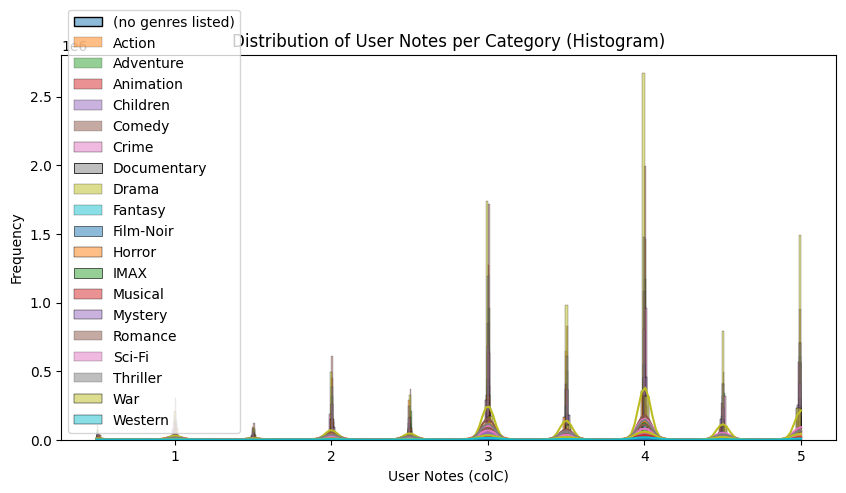

In [45]:
plt.figure(figsize=(10, 5))
for name in result_Genre_Ratings_mvl.groups.keys():  # Iterate through group names
    sns.histplot(result_Genre_Ratings_mvl.get_group(name), label=name, kde=True)
plt.xlabel('User Notes (colC)')
plt.ylabel('Frequency')
plt.title('Distribution of User Notes per Category (Histogram)')
plt.legend()
plt.show()

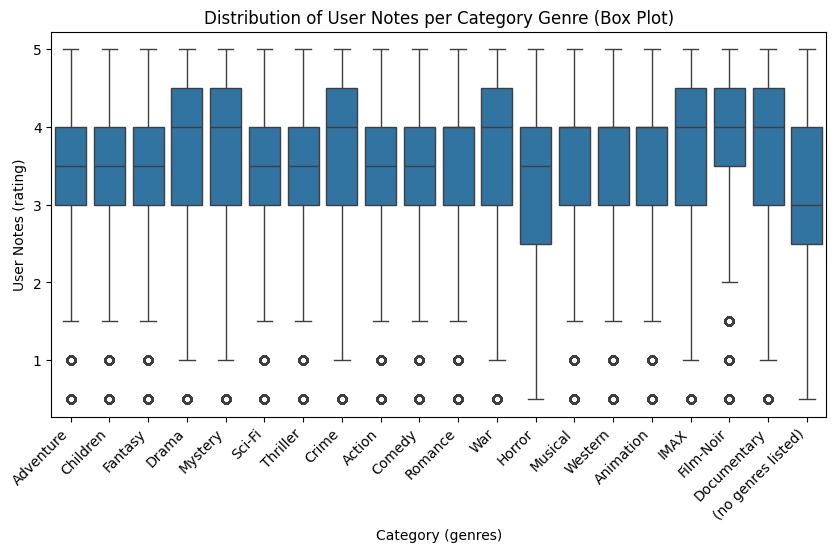

In [11]:
# Box Plots
plt.figure(figsize=(10, 5))
sns.boxplot(x='genres', y='rating', data=df_exploded_genre_ratings_mvl)
plt.xlabel('Category (genres)')
plt.xticks(rotation=45, ha='right') # Rotate labels 45 degrees
plt.ylabel('User Notes (rating)')
plt.title('Distribution of User Notes per Category Genre (Box Plot)')
plt.show()